In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_dir = '/Users/saumitrajoshi/cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
train_path = data_dir + '/train'
test_path = data_dir + '/test'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path + '/parasitized')

['C189P150ThinF_IMG_20151203_142224_cell_84.png',
 'C91P52ThinF_IMG_20150821_123116_cell_189.png',
 'C84P45ThinF_IMG_20150818_101226_cell_98.png',
 'C144P105ThinF_IMG_20151015_163432_cell_310.png',
 'C136P97ThinF_IMG_20151005_141803_cell_131.png',
 'C60P21thinF_IMG_20150804_105034_cell_105.png',
 'C176P137NThinF_IMG_20151201_122708_cell_126.png',
 'C136P97ThinF_IMG_20151005_142437_cell_119.png',
 'C173P134NThinF_IMG_20151130_115733_cell_227.png',
 'C85P46ThinF_IMG_20150820_105154_cell_221.png',
 'C101P62ThinF_IMG_20150918_151507_cell_49.png',
 'C116P77ThinF_IMG_20150930_171844_cell_100.png',
 'C48P9thinF_IMG_20150721_160406_cell_247.png',
 'C184P145ThinF_IMG_20151203_103114_cell_149.png',
 'C99P60ThinF_IMG_20150918_141620_cell_56.png',
 'C132P93ThinF_IMG_20151004_152045_cell_111.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_153.png',
 'C116P77ThinF_IMG_20150930_171844_cell_114.png',
 'C171P132ThinF_IMG_20151119_153150_cell_222.png',
 'C176P137NThinF_IMG_20151201_122708_cell_132.png',


In [9]:
os.listdir(train_path + '/uninfected')

['C13NThinF_IMG_20150614_131318_cell_179.png',
 'C205ThinF_IMG_20151106_152003_cell_21.png',
 'C230ThinF_IMG_20151112_150647_cell_1.png',
 'C134P95ThinF_IMG_20151005_121834_cell_65.png',
 'C141P102ThinF_IMG_20151005_214836_cell_132.png',
 'C182P143NThinF_IMG_20151201_171950_cell_93.png',
 'C181P142ThinF_IMG_20151127_160616_cell_54.png',
 'C142P103ThinF_IMG_20151005_223257_cell_18.png',
 'C80P41ThinF_IMG_20150817_110608_cell_62.png',
 'C144P105ThinF_IMG_20151015_163142_cell_66.png',
 'C12NThinF_IMG_20150614_124212_cell_187.png',
 'C223ThinF_IMG_20151112_104708_cell_190.png',
 'C143P104ThinF_IMG_20151005_225746_cell_133.png',
 'C84P45ThinF_IMG_20150818_101056_cell_87.png',
 'C222ThinF_IMG_20151115_150925_cell_127.png',
 'C1_thinF_IMG_20150604_104919_cell_82.png',
 'C150P111ThinF_IMG_20151115_115950_cell_53.png',
 'C170P131ThinF_IMG_20151119_120233_cell_183.png',
 'C13NThinF_IMG_20150614_131529_cell_168.png',
 'C1_thinF_IMG_20150604_104919_cell_96.png',
 'C150P111ThinF_IMG_20151115_115950

In [10]:
para_cell = train_path + '/parasitized/' + os.listdir(train_path + '/parasitized')[0]

In [11]:
uninfected_cell = train_path + '/uninfected/' + os.listdir(train_path + '/uninfected')[0]

In [12]:
from matplotlib.image import imread

In [13]:
para_img = imread(para_cell)

In [14]:
uninfected_img = imread(uninfected_cell)

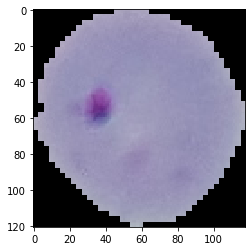

In [15]:
plt.imshow(para_img)

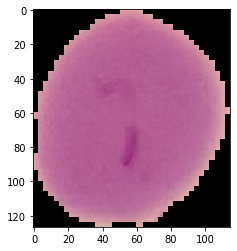

In [16]:
plt.imshow(uninfected_img)

In [17]:
para_img.shape

(121, 118, 3)

In [18]:
uninfected_img.shape

(127, 115, 3)

In [19]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected/'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
np.mean(dim1)

130.92538461538462

In [21]:
np.mean(dim2)

130.75

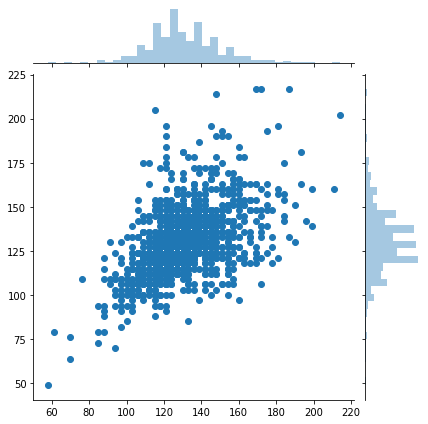

In [22]:
sns.jointplot(dim1, dim2)

In [23]:
image_shape = (130, 130, 3)

In [24]:
batch_size = 16

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             zoom_range=0.1,
                             shear_range=0.1
                             )

In [27]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [28]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
train_image_gen = img_gen.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary')

test_image_gen = img_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen, validation_data=test_image_gen, epochs=20, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
  29/1560 [..............................] - ETA: 17:40 - loss: 18.3155 - accuracy: 0.5065